In [1]:
# %load prepareStats.py
#!/usr/bin/env python

"""
Don't repeat yourself, they say. So this is the stuff that goes in the beginning of all my 
Jupyter Notebooks exploring various F1 statistics. https://github.com/michalkasparek/f1-stats/
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Let's define some useful lists first

unknownResult = ["nan0n", "NaN", "NA", "inf"]
crashes = ["Accident", "Collision", "Fatal accident", "Collision damage", "Spun off"]
dnqs = ["Did not qualify", "Did not prequalify", "107% Rule"]

Europe = ["Austria", "Austrian", "Azerbaijan", "Belgian", "Belgium", "British", "Czech", "Danish", "Dutch", "East German", "Finnish", "France", "French", "German", "Germany", "Hungarian", "Hungary", "Irish", "Italian", "Italy", "Liechtensteiner", "Monaco", "Monegasque", "Netherlands", "Polish", "Portugal", "Portuguese", "Russia", "Russian", "Spanish", "Spain", "Sweden", "Swedish", "Swiss", "Switzerland", "Turkey", "UK"]
NAmerica = ["American", "Canada", "Canadian", "Mexican", "Mexico", "USA"]
SAmerica = ["Argentina", "Argentine", "Brazil", "Brazilian", "Chilean", "Colombian", "Uruguayan", "Venezuelan"]
Asia = ["Bahrain", "Chinese", "China", "Hong Kong", "India", "Indian", "Indonesian", "Japan", "Japanese", "Korea", "Malaysia", "Malaysian", "Qatar", "Saudi Arabia", "Singapore", "Thai", "UAE"]
Africa = ["Morocco", "Rhodesian", "South Africa", "South African"]
Oceania = ["Australia", "Australian", "New Zealander"]
multiple = ["American-Italian", "Argentine-Italian"]
westernEurope = ["Austria", "Belgium", "Germany", "France", "Italy", "Monaco", "Netherlands", "Portugal", "Spain", "Sweden", "Switzerland", "UK"]

streetCircuits = ["Melbourne", "Monte-Carlo", "Montreal", "Valencia", "Marina Bay", "Sochi", "Baku", "Jeddah", "Adelaide", "Phoenix", "Detroit", "Dallas", "Nevada", "California", "Oporto", "Lisbon"]

# Now we're gonna load the stats… (source: http://ergast.com/mrd/db/#csv)

drivers = pd.read_csv(os.path.join("data", "drivers.csv"))
results = pd.read_csv(os.path.join("data", "results.csv"))
races = pd.read_csv(os.path.join("data", "races.csv"))
circuits = pd.read_csv(os.path.join("data", "circuits.csv"))
status = pd.read_csv(os.path.join("data", "status.csv"))
constructors = pd.read_csv(os.path.join("data", "constructors.csv"))

# …merge all the tables into a single dataframe…

results = results.merge(drivers, on="driverId", how="right")
races = races.merge(circuits, on="circuitId", how="right")
results = results.merge(races, on="raceId", how="right")
results = results.merge(status, on="statusId", how="right")
results = results.merge(constructors, on="constructorId", how="right")

# …make the columns more useful…

results["fullname"] = results["forename"] + " " + results["surname"]
results["date"] = pd.to_datetime(results["date"], format="%Y-%m-%d")
results["year"] = results["year"].apply(pd.to_numeric, errors = "coerce").astype(np.int64, errors="ignore")
results["round"] = results["round"].apply(pd.to_numeric, errors = "coerce").astype(np.int64, errors="ignore")
results["position"] = results["position"].apply(pd.to_numeric, errors = "coerce").astype(np.int64, errors="ignore")
results["fastestLapSpeed"] = results["fastestLapSpeed"].apply(pd.to_numeric, errors = "coerce").astype(np.int64, errors="ignore")

# …and create some new columns.

results["year_round"] = results["year"].astype(str).str.slice(0,4) + results["round"].astype(str).str.slice(0,-2).str.zfill(2)
results = results[~results.year_round.isin(unknownResult)]
results["year_round"] = results["year_round"].apply(pd.to_numeric, errors = "coerce").astype(int)

results.loc[results.nationality_x.isin(Europe),"driverContinent"]="Europe"
results.loc[results.nationality_x.isin(NAmerica),"driverContinent"]="NAmerica"
results.loc[results.nationality_x.isin(SAmerica),"driverContinent"]="SAmerica"
results.loc[results.nationality_x.isin(Asia),"driverContinent"]="Asia"
results.loc[results.nationality_x.isin(Africa),"driverContinent"]="Africa"
results.loc[results.nationality_x.isin(Oceania),"driverContinent"]="Oceania"
results.loc[results.nationality_x.isin(multiple),"driverContinent"]="multiple"

results.loc[results.location.isin(streetCircuits),"street"]=True

entries = pd.Series(results.groupby(["driverId"]).size(), name="entries")
results = results.merge(entries, on = ["driverId"], how = "right")

# Now split the main dataframe for wins, podiums and top 6 finishes only 

wins = results[results["position"] == 1]
podiums = results[results["position"] < 4]
top6 = results[results["position"] < 7]

# Finally let's give the plots some swag

plt.style.use("_mpl-gallery")
plt.rcParams["figure.figsize"] = (20,3)

C:\Users\micha\AppData\Local\Temp\ipykernel_5736\1151300188.py:46: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  results = results.merge(constructors, on="constructorId", how="right")
C:\Users\micha\AppData\Local\Temp\ipykernel_5736\1151300188.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["year_round"] = results["year_round"].apply(pd.to_numeric, errors = "coerce").astype(int)
C:\Users\micha\AppData\Local\Temp\ipykernel_5736\1151300188.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [2]:
pd.set_option('display.max_rows', results.shape[0]+1)

pd.set_option('display.max_columns', results.shape[0]+1)

In [3]:
results = results[results.year < 2022]

## Individual drivers achieving a win, podium or top 6 finish in a given season

In [4]:
winningDrivers = wins.groupby(["year"]).nunique()["fullname"].transpose()

In [5]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20,3)

<AxesSubplot:xlabel='year'>

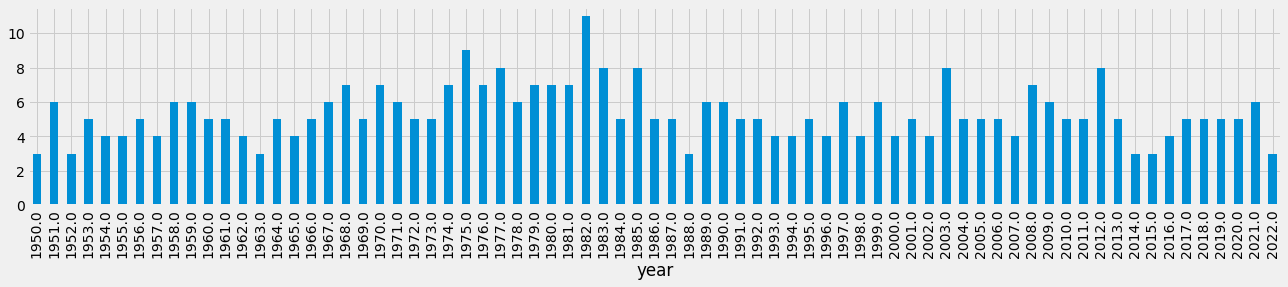

In [6]:
winningDrivers.plot.bar()

In [7]:
podiumDrivers = podiums.groupby(["year"]).nunique()["fullname"].transpose()

<AxesSubplot:xlabel='year'>

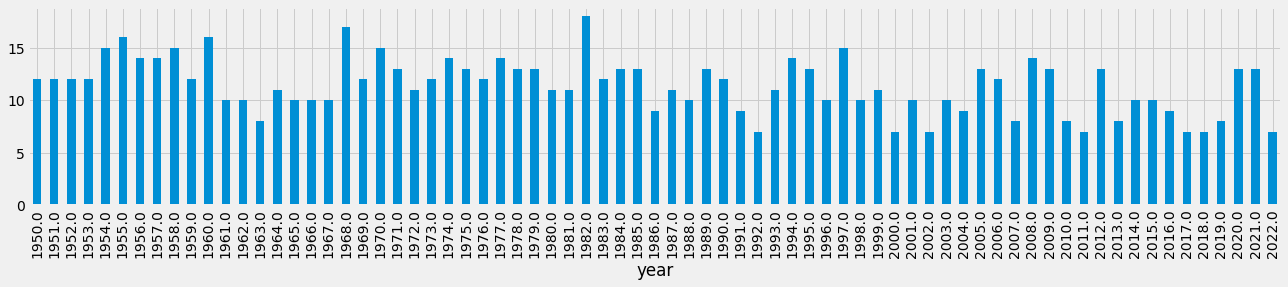

In [8]:
podiumDrivers.plot.bar()

In [9]:
top6drivers = top6.groupby(["year"]).nunique()["fullname"].transpose()

<AxesSubplot:xlabel='year'>

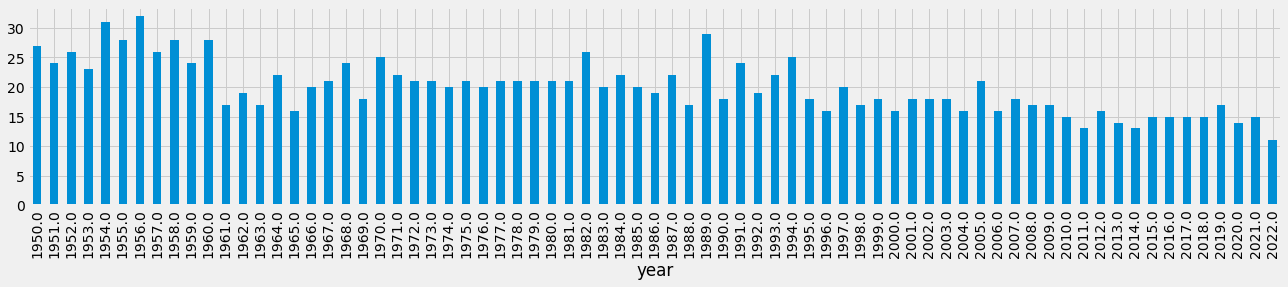

In [10]:
top6drivers.plot.bar()

## Different constructors achieving a win, podium or top 6 finish in a given season

In [11]:
winningConstructors = wins.groupby(["year"]).nunique()["name"].transpose()

<AxesSubplot:xlabel='year'>

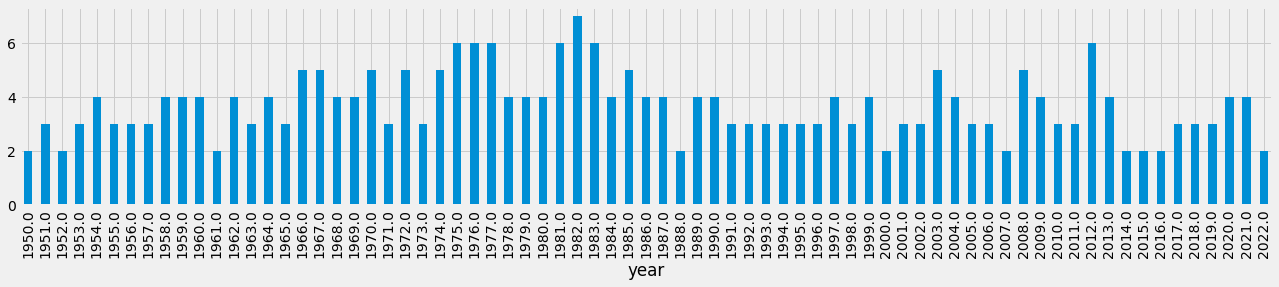

In [12]:
winningConstructors.plot.bar()

In [13]:
podiumConstructors = podiums.groupby(["year"]).nunique()["name"].transpose()

<AxesSubplot:xlabel='year'>

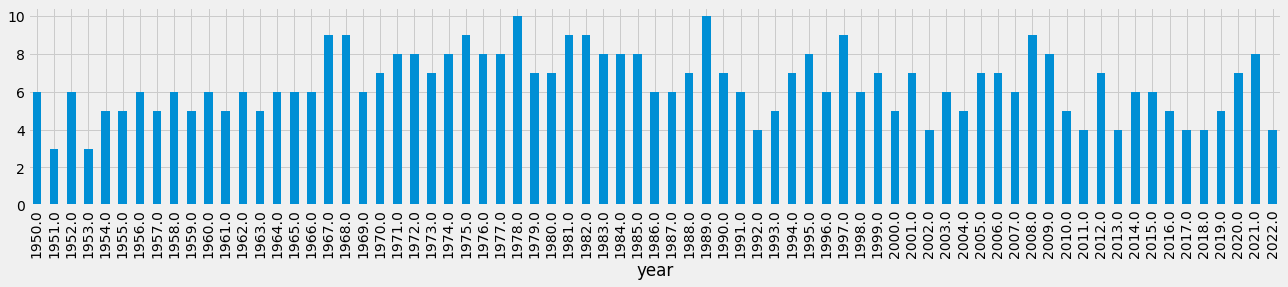

In [14]:
podiumConstructors.plot.bar()

## Drivers' countries and continents of origin

In [15]:
driverNationalities = results.groupby(["year"]).nunique()["nationality_x"].transpose()

<AxesSubplot:xlabel='year'>

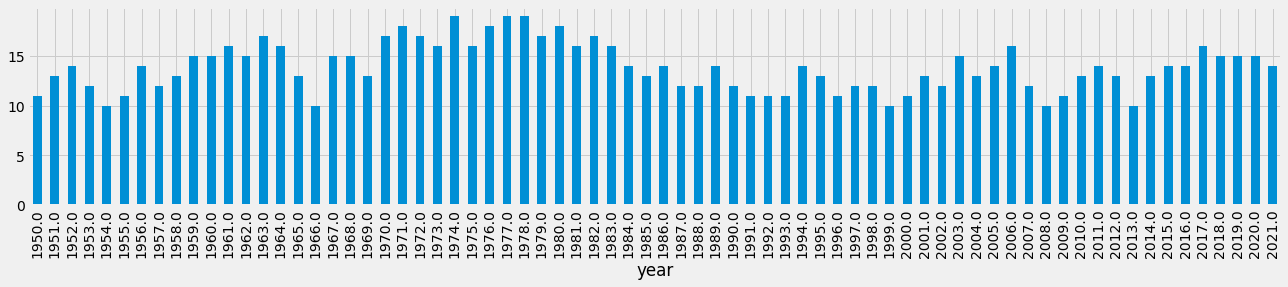

In [16]:
driverNationalities.plot.bar()

In [17]:
winNationality = wins.groupby(["year"]).nunique()["nationality_x"].transpose()

<AxesSubplot:xlabel='year'>

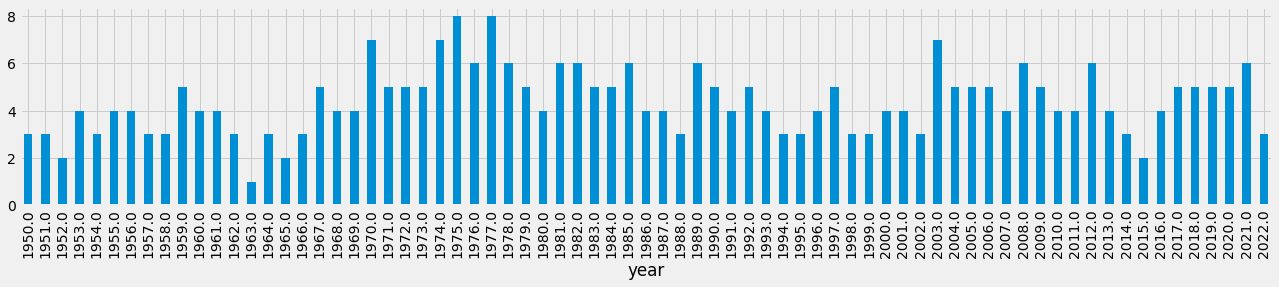

In [18]:
winNationality.plot.bar()

In [19]:
top6teamsNationality = top6.groupby(["year"]).nunique()["nationality_y"].transpose()

<AxesSubplot:xlabel='year'>

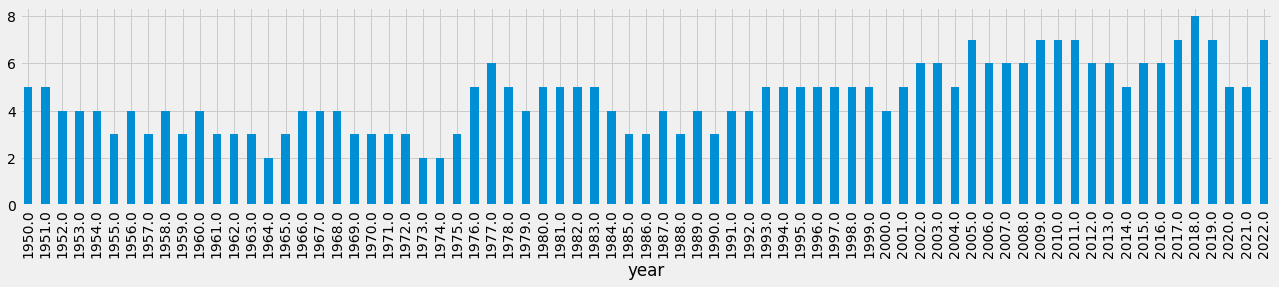

In [20]:
top6teamsNationality.plot.bar()

In [21]:
driverContinents = results.groupby(["year"]).nunique()["driverContinent"].transpose()

<AxesSubplot:xlabel='year'>

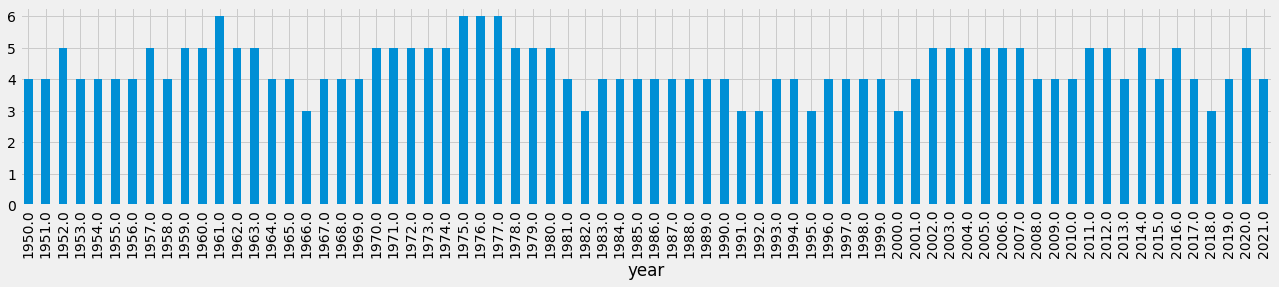

In [22]:
driverContinents.plot.bar()

In [23]:
driverPodiumContinents = podiums.groupby(["year"]).nunique()["driverContinent"].transpose()

<AxesSubplot:xlabel='year'>

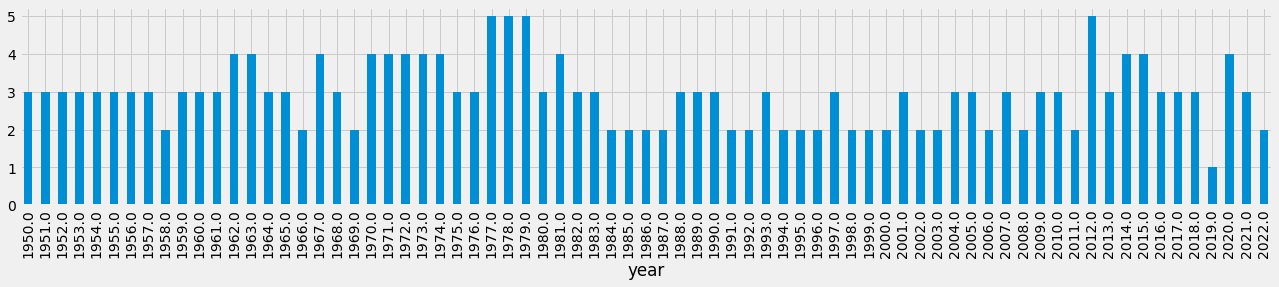

In [24]:
driverPodiumContinents.plot.bar()

2019 Formula One World Championship? More like 2019 Formula One European Championship!

In [25]:
driverWinsContinents = wins.groupby(["year"]).nunique()["driverContinent"].transpose()

<AxesSubplot:xlabel='year'>

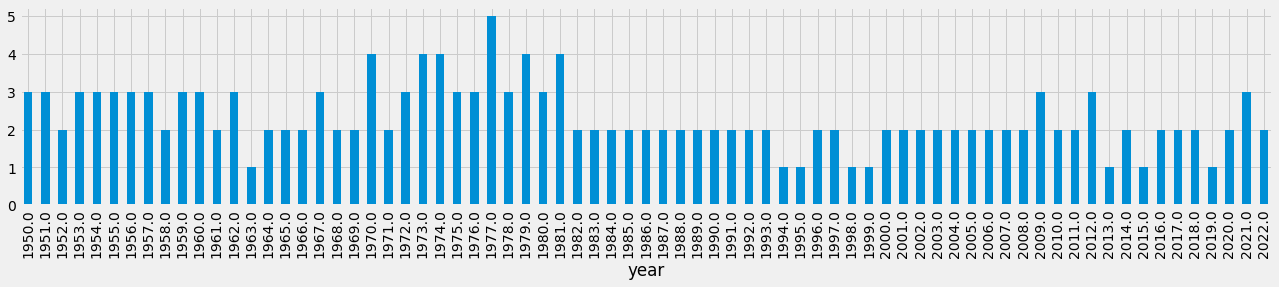

In [26]:
driverWinsContinents.plot.bar()

However, 2019 wasn't the first season with only European drivers winning.

In [27]:
europeanWinsRatio = wins[wins["driverContinent"] == "Europe"].groupby(["year"]).nunique()["raceId"].transpose() / wins.groupby(["year"]).nunique()["raceId"].transpose()

<AxesSubplot:xlabel='year'>

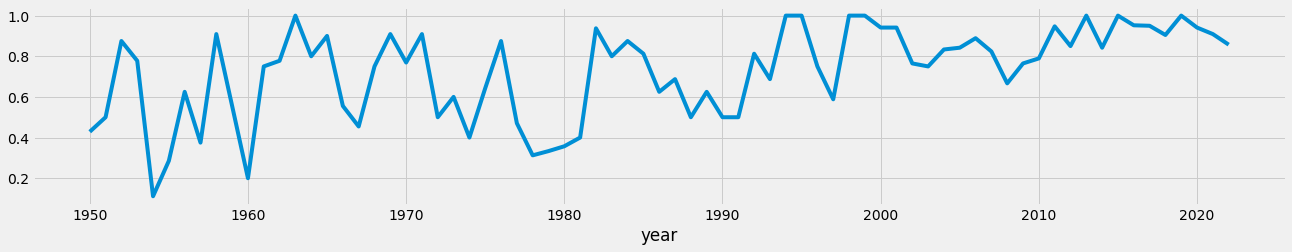

In [28]:
europeanWinsRatio.plot()

In [29]:
europeanPodiumRatio = podiums[podiums["driverContinent"] == "Europe"].groupby(["year"])["raceId"].count() / podiums.groupby(["year"])["raceId"].count()

<AxesSubplot:xlabel='year'>

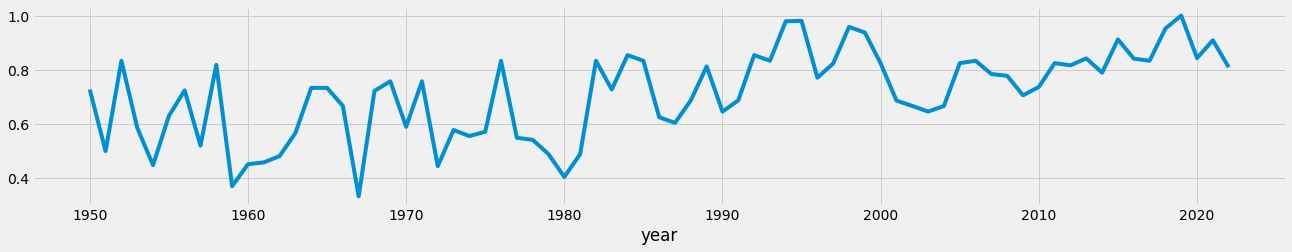

In [30]:
europeanPodiumRatio.plot()

In [31]:
results[~results.status.isin(dnqs)].groupby(["year", "location", "year_round"])["nationality_x"].nunique().nlargest(10)

year    location        year_round
1974.0  Anderstorp      197407        16
1978.0  Kent            197810        16
        New York State  197815        16
        Spielberg       197812        16
1979.0  Dijon           197908        16
        Hockenheim      197910        16
        Montreal        197914        16
        Silverstone     197909        16
        Spielberg       197911        16
        Zandvoort       197912        16
Name: nationality_x, dtype: int64

In [32]:
results[(~results.status.isin(dnqs))].groupby(["nationality_x", "location", "year", "round"])["nationality_x"].count().nlargest(100)

nationality_x  location              year    round
American       Indianapolis          1954.0  2.0      55
                                     1953.0  2.0      47
                                     1950.0  3.0      35
                                     1955.0  3.0      35
                                     1951.0  2.0      34
                                     1956.0  3.0      34
                                     1957.0  3.0      33
                                     1958.0  4.0      33
                                     1959.0  2.0      33
                                     1960.0  3.0      33
                                     1952.0  2.0      32
British        Silverstone           1952.0  5.0      18
                                     1954.0  5.0      18
               Liverpool             1961.0  5.0      16
                                     1959.0  5.0      15
                                     1957.0  5.0      14
               Silverstone           

## European Championship

Counting only points achieved by European drivers on European circuits (including Istanbul, Baku and Sochi).

Michael Schumacher would have won the 1997 EC, but we're going to DSQ him for hitting Jacques Villeneuve in Jerez, just like in the real 1997 WC.

See also: [European Championship](https://f1.fandom.com/wiki/European_Championship)

> The European Championship existed as a predecessor to the Formula One World Championship and was held between 1931 and 1939. The first champion was Ferdinando Minoia, with Rudolf Caracciola winning three titles. The championship was discontinued because of the outbreak of World War II in 1939, and no champion was officially declared for the last season. From 1936, the German drivers, including Caracciola, drove under the Nazi flag.

In [33]:
ec = results[~(results.fullname.eq("Michael Schumacher") & results.year.eq(1997))]
ec = ec[ec.nationality_x.isin(Europe) & ec.country.isin(Europe)]

In [34]:
ec.groupby(["year", "fullname"]).agg({"points": sum}).groupby("year")["points"].nlargest(3)

year    year    fullname             
1950.0  1950.0  Nino Farina               30.00
                Luigi Fagioli             28.00
                Louis Rosier              13.00
1951.0  1951.0  Alberto Ascari            28.00
                Nino Farina               22.00
                Luigi Villoresi           18.00
1952.0  1952.0  Alberto Ascari            53.50
                Nino Farina               27.00
                Piero Taruffi             22.00
1953.0  1953.0  Alberto Ascari            37.50
                Nino Farina               32.00
                Mike Hawthorn             24.00
1954.0  1954.0  Mike Hawthorn             24.64
                Maurice Trintignant       14.00
                Karl Kling                12.00
1955.0  1955.0  Stirling Moss             22.00
                Eugenio Castellotti       12.00
                Piero Taruffi              9.00
1956.0  1956.0  Stirling Moss             28.00
                Peter Collins             25.00
  

In [35]:
ec.groupby(["year", "fullname"]).agg({"points": sum}).groupby("year")["points"].nlargest(1).groupby("fullname").count().nlargest(50)

fullname
Lewis Hamilton           8
Alain Prost              7
Michael Schumacher       7
Stirling Moss            4
Nigel Mansell            4
Jim Clark                3
Alberto Ascari           3
Jackie Stewart           3
Niki Lauda               3
Fernando Alonso          3
Sebastian Vettel         3
Graham Hill              2
Jacky Ickx               2
Mike Hawthorn            2
Jochen Rindt             2
Clay Regazzoni           2
Mika Häkkinen            2
Nino Farina              1
Ronnie Peterson          1
Jenson Button            1
Max Verstappen           1
James Hunt               1
Jacques Laffite          1
Innes Ireland            1
Heinz-Harald Frentzen    1
Didier Pironi            1
David Coulthard          1
Damon Hill               1
Wolfgang von Trips       1
Name: points, dtype: int64

Errata: in fact, Stirling Moss would be a 5-time European F1 Champion, as he achieved better results than Innes Ireland in 1960 with the same point score.

## Drivers' age

In [36]:
results["dob"] = pd.to_datetime(results["dob"], format="%Y-%m-%d")

In [37]:
results["age"] = results["date"] - results["dob"]

In [38]:
results["ageyears"] = results["age"] / np.timedelta64(1, 'Y')

In [39]:
meanAgeSeason = results.groupby("year")["ageyears"].mean()
maxAgeSeason = results.groupby("year")["ageyears"].max()
minAgeSeason = results.groupby("year")["ageyears"].min()

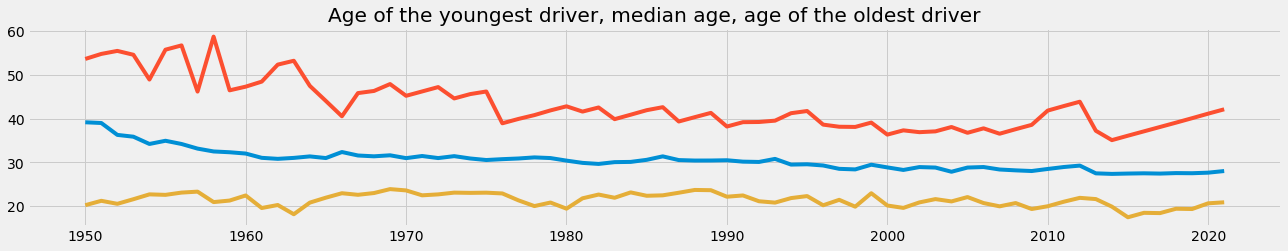

In [40]:
fig, ax = plt.subplots()
ax.plot(meanAgeSeason)
ax.plot(maxAgeSeason)
ax.plot(minAgeSeason)
plt.title("Age of the youngest driver, median age, age of the oldest driver")
plt.show()

## How diverse has the F1 calendar been?

In [41]:
results.loc[results.country.isin(Europe),"locationContinent"]="Europe"
results.loc[results.country.isin(NAmerica),"locationContinent"]="NAmerica"
results.loc[results.country.isin(SAmerica),"locationContinent"]="SAmerica"
results.loc[results.country.isin(Asia),"locationContinent"]="Asia"
results.loc[results.country.isin(Africa),"locationContinent"]="Africa"
results.loc[results.country.isin(Oceania),"locationContinent"]="Oceania"

<AxesSubplot:xlabel='year'>

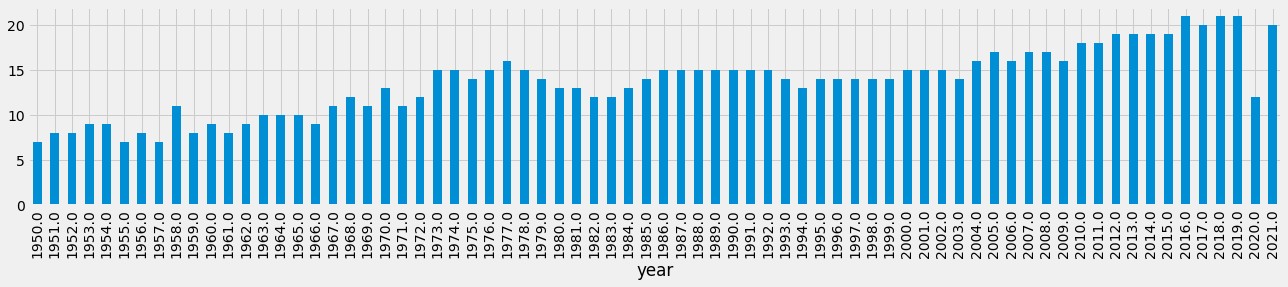

In [42]:
results.groupby("year")["country"].nunique().plot.bar()

<AxesSubplot:xlabel='year'>

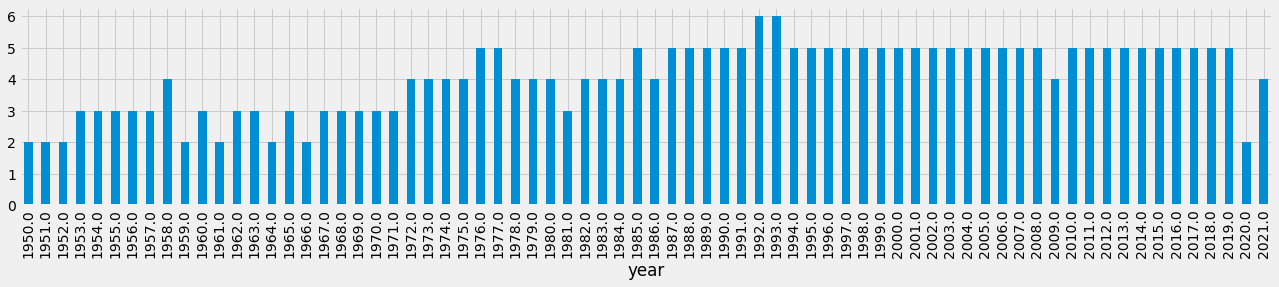

In [43]:
results.groupby("year")["locationContinent"].nunique().plot.bar()

<AxesSubplot:xlabel='year'>

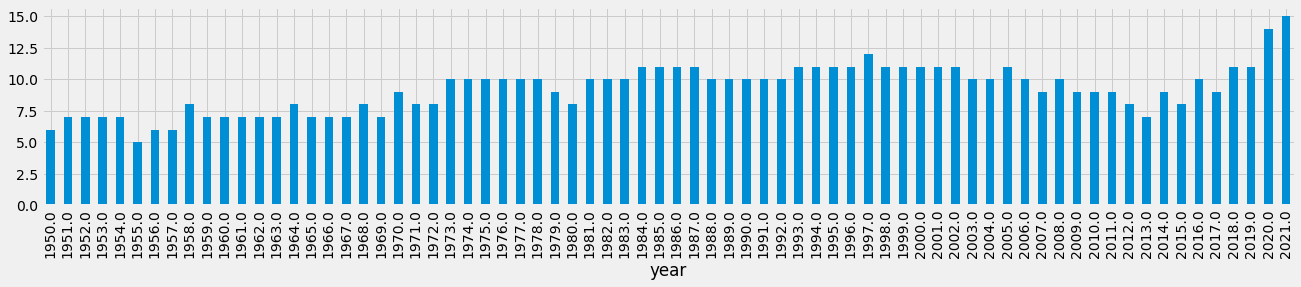

In [44]:
results[results["locationContinent"] == "Europe"].groupby("year")["year_round"].nunique().plot.bar()

In [45]:
europeanRacesRatio = pd.Series(results[results["locationContinent"] == "Europe"].groupby("year")["year_round"].nunique() / results.groupby("year")["year_round"].nunique())
NAmericanRacesRatio = pd.Series(results[results["locationContinent"] == "NAmerica"].groupby("year")["year_round"].nunique() / results.groupby("year")["year_round"].nunique())
SAmericanRacesRatio = pd.Series(results[results["locationContinent"] == "SAmerica"].groupby("year")["year_round"].nunique() / results.groupby("year")["year_round"].nunique())
asianRacesRatio = pd.Series(results[results["locationContinent"] == "Asia"].groupby("year")["year_round"].nunique() / results.groupby("year")["year_round"].nunique())
africanRacesRatio = pd.Series(results[results["locationContinent"] == "Africa"].groupby("year")["year_round"].nunique() / results.groupby("year")["year_round"].nunique())
oceanianRacesRatio = pd.Series(results[results["locationContinent"] == "Oceania"].groupby("year")["year_round"].nunique() / results.groupby("year")["year_round"].nunique())

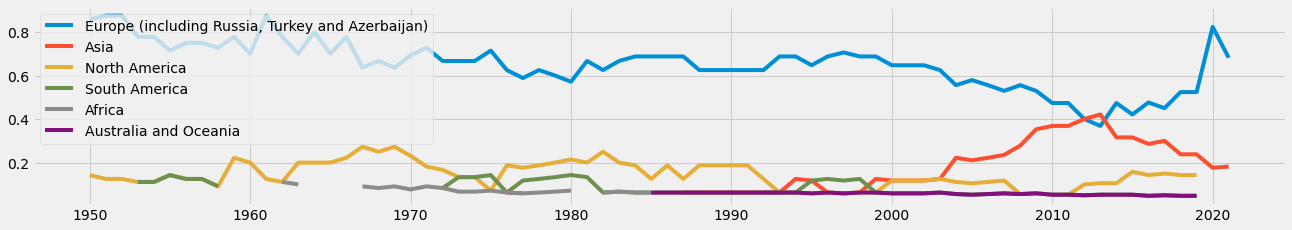

In [46]:
plt.plot(europeanRacesRatio, label="Europe (including Russia, Turkey and Azerbaijan)")
plt.plot(asianRacesRatio, label="Asia")
plt.plot(NAmericanRacesRatio, label="North America")
plt.plot(SAmericanRacesRatio, label="South America")
plt.plot(africanRacesRatio, label="Africa")
plt.plot(oceanianRacesRatio, label="Australia and Oceania")
plt.legend()
plt.show()

In [47]:
westernEurope = ["Austria", "Belgium", "Germany", "France", "Italy", "Monaco", "Netherlands", "Portugal", "Spain", "Sweden", "Switzerland", "UK"]
results["westernEurope"] = False
results.loc[results.country.isin(westernEurope),"westernEurope"] = True

<AxesSubplot:xlabel='year'>

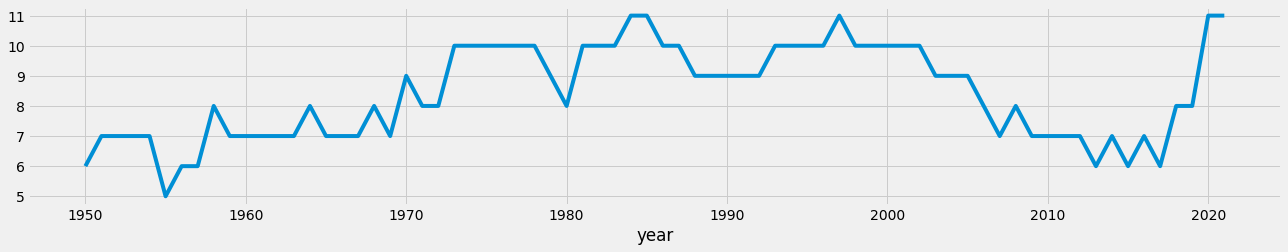

In [48]:
results[results["westernEurope"] == True].groupby("year")["year_round"].nunique().plot()